In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats as ss
import seaborn as sns

#**Ley de los grandes números**
Es considerado el primer teorema fundamental de la teoría de probabilidad. Establece que la frecuencia de los resultados de cierto experimento aleatorio, tiende a estabilizarse en cierto número
que es precisamente la probabilidad, cuando el experimento se realiza muchas veces. Es decir,
los resultados convergen al valor esperado.

*Ejemplo:*

Veamos el experimento de lanzar una moneda (no cargada) al aire y que su resultado sea cara.
Desde un enfoque ”frecuentista” si solo nos quedamos con los primeros lanzamientos, la probabilidad
de sacar cara no será precisamente 0,5.

In [ ]:
#P(X)=casos favorables/casos totales

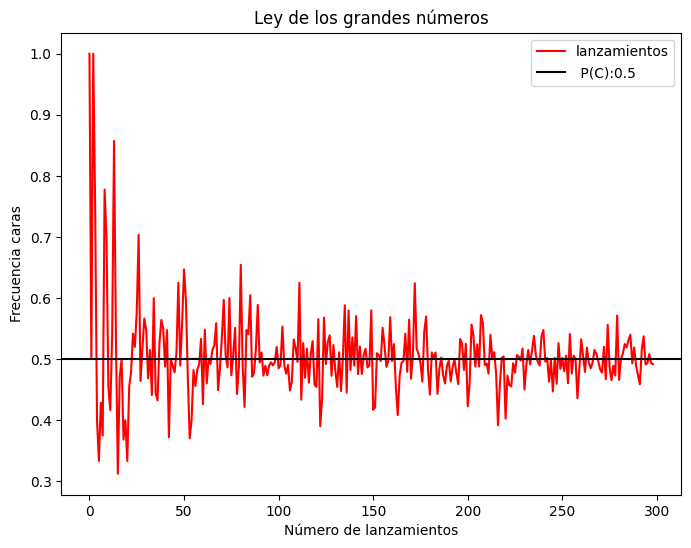

In [ ]:
#Experimento de la moneda, cara=1 cruz=0
resultados=[]
for lanzamientos in range (1,300):
  lanzamientos=np.random.choice([0,1],lanzamientos)
  caras=lanzamientos.mean()
  resultados.append(caras)
#print(lanzamientos)
df=pd.DataFrame({'lanzamientos':resultados})
df.plot(title='Ley de los grandes números',color='r',figsize=(8,6))
plt.axhline(0.5,color='black',label=f' P(C):0.5')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia caras')
plt.legend()
plt.show()

#**Teorema central del límite**

Sea $\left\{X_1, X_2, ..., X_n\right\}$ una muestra de variables aleatorias independientes e identicamente distribuidas
 cada una con $E(X_i) = \mu$ y $Var(X_i) = \sigma^2$, entonces la función de probabilidad para la media
muestral converge a una distribución normal con media $\mu$ o esperanza  y varianza $\dfrac{\sigma^2}{n}$.

 Es decir,
\begin{align*}
E(\bar{X})=\mu \qquad\mathrm\qquad Var(\bar{X})=\frac{\sigma^2}{n}
\end{align*}

De esta forma
$$
\bar{X}\sim N\left(\mu,\frac{\sigma^2}{n}\right)
$$

###**Observación:**

Si $n>30$, se puede utiliza el teorema del límite central.

# **Inferencia Estadística**

La inferencia estadística estudia cómo determinar conclusiones generales
para toda la población a partir del estudio de una muestra y el grado de significación de los
resultados obtenidos.


Observación:

La significancia (mientras no se diga lo contrario) es $\alpha=0.05$

## **Definición: Intervalo de confianza**

Un intervalo de confianza, corresponde a un rango de valores que se utiliza para estimar un parámetro poblacional desconocido (puede ser la media, o la proporción).

Componentes de un intervalo de confianza:

- Nivel de confianza: Indica el grado de precisión. Usualmente se considera un $95\%$ o un $99\%$.

- Estimador muestral: este valor se obtiene directamente de la muestra (necesitamos conocer $\bar{x},s^2,s,\bar{\rho}$)

- Margen de error: determinado por la desviación estándar y el tamaño de la muestra.

Observación:

$$
Ndc=1-\alpha
$$
Con Ndc : nivel de confianza


## **Intervalo de confianza**
## 1. Intervalos de confianza para $\mu$




### 1. Intervalos de confianza para $\mu$

Sean $\left\{X_1, X_2, . . . , X_n\right\}$ una muestra aleatoria de una población con media $\mu$ y desviación estándar $\sigma$. Siempre que $n$ es grande, el teorema del límite central implica que $\bar{X}$ tiene de manera
aproximada una distribución normal cualquiera que sea la naturaleza de la distribución
de la población. Se deduce entonces que $$Z =(\bar{X}-\mu)/(\sigma/\sqrt{n})$$ tiene aproximadamente una
distribución estándar normal, de modo que
$$
P\left(-z_{1-\alpha/2}<\frac{\bar{X}-\mu}{\sigma\sqrt{n}}<z_{1-\alpha/2}\right)≈1-\alpha
$$

1. Si **$\sigma^2$ es conocida**,  el intervalo de confianza para la media es
$$
\mu\in\left[\bar{X}\pm z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}} \right]
$$

El valor de $\alpha$ se conoce como el error tipo 1 del intervalo de confianza (o significancia). Corresponde a la probabilidad de errar al realizar la estimación (y es definido por el investigador)

**Obs**

Mientras no se diga lo contrario

$$
\alpha=0.05
$$

Observación:

La media $\mu$ pertenece a
$$\left[\bar{X}- z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}},\bar{X}+ z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}  \right]$$

**Ejemplo 1:**

Se desea definir un intervalo de confianza para la media real de una muestra de 10 objetos. Para esto, se considera que $\sigma=2$ y $\bar{x}=15$

La media $\mu$ pertenece a
$$\left[\bar{X}- z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}},\bar{X}+ z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}  \right]$$

In [ ]:
#Como no nos dicen nada de la significancia, supondremos que es 5%
alph=0.05 #significancia
Ndc=1-alph # Nivel de confianza
#Ndc=0.95

In [ ]:
#punto porcentual
punto_porcentual=ss.norm(0,1).ppf(1-alph/2)


In [ ]:
# Datos muestrales
media_muestral,std_poblacional,tamaño=15,2,10

In [ ]:
media_muestral-punto_porcentual*std_poblacional/math.sqrt(tamaño),media_muestral+punto_porcentual*std_poblacional/math.sqrt(tamaño)

(np.float64(13.760409935390877), np.float64(16.239590064609125))

In [ ]:
# Si bien no se conoce el verdadero valor de la mu, con un 95% de certeza se puede afirmar que pertenece al intervalo
#[13.7 ,  16.23]

Forma alternativa de calcular el intervalo de confianza

In [ ]:
Ndc=0.95
l_inf,l_sup=ss.norm.interval(Ndc,media_muestral,std_poblacional/math.sqrt(tamaño))

In [ ]:
print(f' Con un 95% de certeza, la media poblacional está contenida en : [{round(l_inf,2)} , {round(l_sup,2)}]')

 Con un 95% de certeza, la media poblacional está contenida en : [13.76 , 16.24]



### Apartado: Distribución $t$ de Student
En muchos escenarios experimentales el conocimiento de $\sigma$ no es más razonable que el conocimiento de la media de la población $\mu$. A menudo, de hecho, las estimaciones
de $\sigma$ y $\mu$ son proporcionadas por la información muestral.

Como resultado, para poblaciones pequeñas ($n<30$) un estadístico natural a considerar para inferir sobre $\mu$ es
$$
T=\frac{\bar{X}-\mu_0}{S/\sqrt{n}}
$$

donde $\bar{X}$ y $S$ corresponden al promedio y desviación estándar muestral, respectivamente.

In [ ]:
n=5
x_p=np.arange(-5,5,0.0001)
y_normal=ss.norm(0,1).pdf(x_p) # ss.norm(media=0,std=1).pdf(puntos)
y_t=ss.t.pdf(x_p,n-1) # ss.t.pdf(puntos, grados de libertad)
# La distribución t queda enteramente definida por el tamaño de la muestra

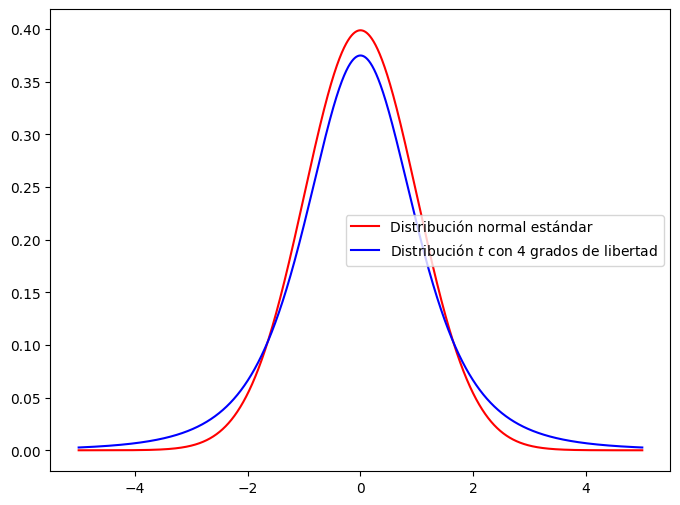

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(x_p,y_normal,color='red',label=f'Distribución normal estándar') #media = 0 y std=1
plt.plot(x_p,y_t,color='blue',label=f'Distribución $t$ con {n-1} grados de libertad')
plt.legend()
plt.show()

2. **Si $\sigma^2$ es desconocida**

Si $\sigma$ es desconocida, se puede construir el intervalo utilizando la distribución $t$ de Student con
$n-1$ grados de libertad, resultando

$$
\mu \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$

Un límite de confianza superior para $\mu$ es
$$
\bar{X}+t_{1-\alpha,n-1}\cdot \frac{s}{\sqrt{n}}
$$
y reemplazando $+$ por $-$ en la última expresión, se obtiene un límite de confianza inferior  para $\mu$.

Con $s$ desviación estándar muestral

$n$: tamaño de la muestra

$s$: desviación estándar muestral

$\bar{x}$: media muestral

**Ejemplo 2:**

Un restaurante desea estimar el monto promedio de las propinas que dejan los clientes. Para ello, se toma una muestra aleatoria de 10 propinas registradas en la base de datos tips.




In [ ]:
# cargar la base de datos
tip=sns.load_dataset('tips')

In [ ]:
import random

In [ ]:
muestra=np.random.choice(tip['tip'],size=10)

In [ ]:
print(f'La muestra extraida es: {muestra}')

La muestra extraida es: [3.   2.   3.5  3.21 3.   3.   4.29 3.   1.68 2.  ]


1. Obtener el intervalo de confianza para la propina media real, considerando un nivel de confianza del $95\%$

$$
\mu \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$

In [ ]:
# extraer datos muestrales
media,std,n=muestra.mean(),muestra.std(),len(muestra)

In [ ]:
Ndc=0.95

In [ ]:
# Intervalo de confianza
L_inf,L_sup=ss.t.interval(Ndc,n-1,media,std/math.sqrt(n))
#ss.t.interval(nivel de confianza, grados de libertad, media, margen de error)


In [ ]:
print(f'IC: [{round(L_inf,2)},{round(L_sup,3)}]')

IC: [2.34,3.4]


2. Graficar el intervalo de confianza del ítem anterior

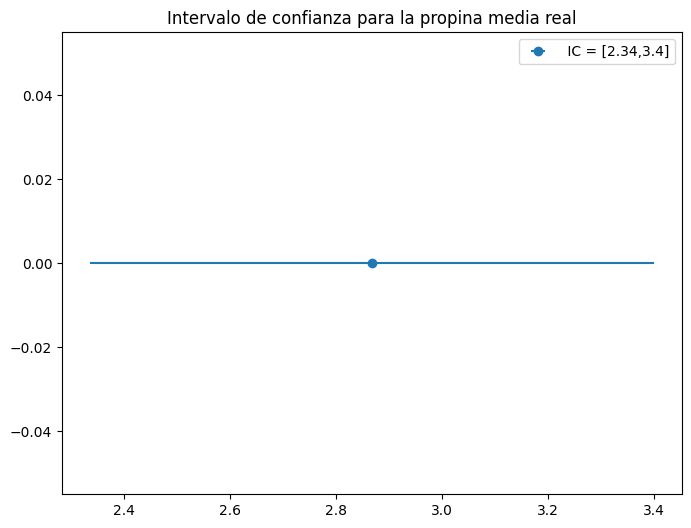

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.errorbar(y=0,x=media,xerr=[[media-L_inf],[L_sup-media]],fmt='o',label=f' IC = [{round(L_inf,2)},{round(L_sup,3)}]')
plt.legend()
plt.title('Intervalo de confianza para la propina media real')
plt.show()

3. Considera una muestra de 6 fumadores.
   
   Obtener un intervalo de confianza, para la propina media real que deja este grupo. Primero con un nivel de confianza del $95\%$ y luego con un nivel de confianza del $99\%$. ¿ Qué conclusiones se pueden obtener al respecto?


In [ ]:
# Seleccionamos las propinas que dejan los fumadores
fumadores=tip[tip['smoker']=='Yes']['tip']


In [ ]:
muestra2=np.random.choice(fumadores,size=6)
# Muestra aleatoria de las propinas que dejan los fumadores

$$
\mu \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$


In [ ]:
# Datos muestrales
media_fumador,std_fumador=muestra2.mean(),muestra2.std()

In [ ]:
# Intervalo de confianza del 95%
Ndc=0.95
ss.t.interval(Ndc,6-1,media_fumador,std_fumador/math.sqrt(6))

(np.float64(1.8228613507779823), np.float64(4.367138649222018))

In [ ]:
# Intervalo de confianza del 99%
ndc=0.99
ss.t.interval(ndc,6-1,media_fumador,std_fumador/math.sqrt(6))

(np.float64(1.0995587899740242), np.float64(5.090441210025976))

In [ ]:
# Observación: A mayor nivel de confianza, mayor dispersión ya que se busca garantizar que el verdadero valor población
# se encuentre contenido en el intervalo

**Ejemplo 4:**

Una agencia de seguridad vial desea estimar el promedio de accidentes de tráfico por cada 100 millones de millas recorridas en diferentes regiones de Chile. Para ello, se selecciona una muestra aleatoria de 10 observaciones a partir de la base de datos **car_crashes** de Seaborn.

In [ ]:
accidentes=sns.load_dataset('car_crashes')

In [ ]:
# Consideramos una muestra aleatoria de 10 observaciones de la variable total
muestra3=np.random.choice(accidentes['total'],size=10)

1.  Calcular un intervalo de confianza del $95\%$ para el promedio real de accidentes de tránsito (variable **total**).

Sea $\mu$ el promedio real de accidentes de tránsito

$$
\mu \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$


In [ ]:
# parámetros muestrales
media_total,std_total=muestra3.mean(),muestra3.std()

In [ ]:
Ndc=0.95
l_inferior,l_superior=ss.t.interval(Ndc,10-1,media_total,std_total/math.sqrt(10))

In [ ]:
print(f' Con un 95% de confianza, el promedio real de accidentes de transito se encuentra en : [{round(l_inferior,4)},{round(l_superior,4)}]')

 Con un 95% de confianza, el promedio real de accidentes de transito se encuentra en : [10.7955,16.2245]


2. Se selecciona una muestra aleatoria de 10 observaciones y se analiza la variable **not distracted**, que representa la tasa de accidentes en los que el conductor no estaba distraído. Determinar un intervalo de confianza para la tasa real de accidentes, en donde los conductores no estaban distraídos e interpretar este resultado en un contexto de seguridad vial.

Sol:

Sea $\mu_N$  tasa media real de los accidentes en los cuales el conductor no estaba distraído

$$
\mu_N \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$


In [ ]:
muestra_distraido=np.random.choice(accidentes['not_distracted'],size=10)

In [ ]:
# Extraemos los datos muestrales de la muesta anterior
media_nodistracted,std_nodistracted=muestra_distraido.mean(),muestra_distraido.std()

In [ ]:
# Intervalo de confianza al 95
Ndc=0.95
ss.t.interval(Ndc,10-1,media_nodistracted,std_nodistracted/math.sqrt(10))

(np.float64(11.168639643852702), np.float64(14.953360356147295))

3.
Si **$\sigma^2$ es desconocida** y el tamaño de la muestra es grande ($n>30$) el intervalo de confianza para la media es
$$
\mu\in\left[\bar{X}\pm z_{1-\frac{\alpha}{2}}\cdot\frac{s}{\sqrt{n}} \right]
$$

Esto debido a que si el tamaño de la muestra es grande, no existe mayor diferencia entre una distribución normal o una distribución $t$ de Student

**Ejemplo 4**

Un restaurante desea analizar la cantidad promedio de propina que dejan sus clientes para mejorar sus estrategias de servicio y satisfacción al cliente.
Para estimar el promedio de las propinas en la población de sus clientes habituales, toman una muestra de datos durante varios días recopiladas en la base de datos tips.

1. Con un nivel de confianza del $95\%$, ¿cuál es la media de las propinas que dejan los clientes mujeres?, ¿cuál es la media de las propinas que dejan los clientes hombres?.

 Determinar un intervalo de confianza para la propina media real de ambos grupos. Graficar

**Sol:**

In [ ]:
# Mujeres
propinas_mujer=tip[tip['sex']=='Female']['tip']

In [ ]:
# Parámetros muestrales
media_mujer,std_mujer,n_mujer=propinas_mujer.mean(),propinas_mujer.std(),len(propinas_mujer)
#media,std,tamaño de la muestra

In [ ]:
print(f'La propina media que dejan las mujeres es: ${round(media_mujer,3)}')

La propina media que dejan las mujeres es: $2.833


In [ ]:
# Intervalo de confianza para la propina media real que deja este grupo
ss.norm.interval(Ndc,media_mujer,std_mujer/math.sqrt(n_mujer))

(np.float64(2.5898034688698264), np.float64(3.0770930828543106))

In [ ]:
L_inf1,L_sup1=ss.t.interval(Ndc,n_mujer-1,media_mujer,std_mujer/math.sqrt(n_mujer))

In [ ]:
# Intervalo de confianza para la propina real que dejan las mujeres
print(f' IC =[{L_inf1,L_sup1}]')

 IC =[(np.float64(2.5863264665773715), np.float64(3.0805700851467654))]


In [ ]:
# Hombres
propinas_hombres=tip[tip['sex']=='Male']['tip']

In [ ]:
# Parámetros muestrales
media_hombre,std_hombre,n_hombre=propinas_hombres.mean(),propinas_hombres.std(),len(propinas_hombres)

In [ ]:
print(f' La propina media que dejan los hombres es: ${media_hombre}')

 La propina media que dejan los hombres es: $3.0896178343949043


In [ ]:
# Intervalo de confianza para este grupo
L_inf2,L_sup2=ss.t.interval(Ndc,n_hombre-1,media_hombre,std_hombre/math.sqrt(n_hombre))

In [ ]:
print(f' IC :[{L_inf2,L_sup2}]')

 IC :[(np.float64(2.854868222157624), np.float64(3.3243674466321846))]


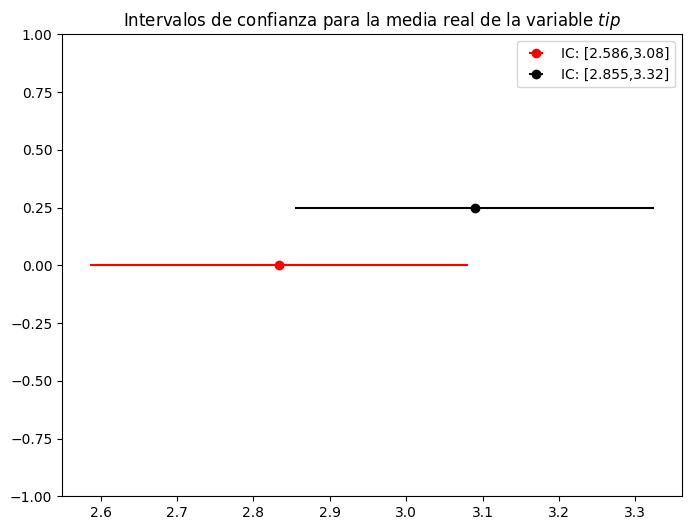

In [ ]:
# Graficar
fig=plt.figure(figsize=(8,6))
plt.errorbar(y=0,x=media_mujer,xerr=[[media_mujer-L_inf1],[L_sup1-media_mujer]],fmt='o',color='red',label=f'IC: [{L_inf1:.3f},{round(L_sup1,2)}]')# Intervalo de confianza para las propinas que dejan las mujeres
plt.errorbar(y=0.25,x=media_hombre,xerr=[[media_hombre-L_inf2],[L_sup2-media_hombre]],fmt='o',color='black',label=f'IC: [{L_inf2:.3f},{round(L_sup2,2)}]')
plt.ylim(-1,1) #Espaciar el eje Y
plt.legend()
plt.title('Intervalos de confianza para la media real de la variable $tip$')
plt.show()

**Ejercicio 5 (Tarea):**

El hundimiento del RMS Titanic es uno de los desastres marítimos más famosos de la historia. El 15 de abril de 1912, el transatlántico chocó contra un iceberg en su viaje inaugural de Southampton a Nueva York, lo que provocó la muerte de más de 1.500 personas.

El conjunto de datos Titanic, contiene información sobre  891  pasajeros del Titanic, incluidos sus edades, sexos, clases de transporte, tarifas y más. Este conjunto de datos es un recurso valioso para los científicos de datos que desean aprender sobre el análisis exploratorio de datos (EDA).

1. Determinar un intervalo de confianza al $95\%$ para la edad media real, de los invidividuos que embarcaron en Southampton.

2. Determinar un intervalo de confianza al $95\%$ para la edad media de las mujeres que pertenecen a la tercera clase. Graficar

### Intervalos de confianza de una cola

El intervalo de confianza superior al $100(1-\alpha)\%$ para $\mu$ es
$$
\mu\leq \bar{x}+z_{1-\alpha}\cdot s/\sqrt{n}
$$

El intervalo de confianza inferior al $100(1-\alpha)\%$ para $\mu$ es
$$
\bar{x}-z_{1-\alpha}\cdot\sigma/ s\leq \mu
$$

# Intevalos de confianza para la varianza $\sigma^2$

Si $X_1, ...,X_n$ es una muestra aleatoria de una población normal con media μ y varianza $\sigma^2$, entonces:


$$
\frac{(n-1)S^2}{\sigma^2}\sim \chi^2_{n-1}
$$
tiene una distribución chí cuadrada, con $n-1$ grados de libertad, la cual se abrevia.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
n=20
m=100
x=np.arange(0,200,0.001)
y_chi=ss.chi2.pdf(x,n-1)
y_chi2=ss.chi2.pdf(x,m-1)

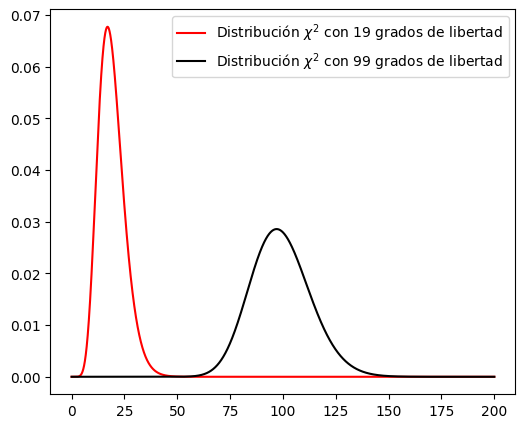

In [ ]:
fig=plt.figure(figsize=(6,5))
plt.plot(x,y_chi,color='red',label=f'Distribución $\chi^2$ con {n-1} grados de libertad')
plt.plot(x,y_chi2,color='black',label=f'Distribución $\chi^2$ con {m-1} grados de libertad')
plt.legend()
plt.show()

 ## Intervalos de confianza para $\sigma^2$
Utilizaremos la distribución $\chi^2$ (chí cuadrado).

Considerar una población que se modela con una distribución normal. Si se tiene una muestra aleatoria $\left\{X_1,X_2,\cdots,X_n\right\}$, entonces el estadístico $\dfrac{(n-1)s^2}
{\sigma^2}$ sigue una distribución $\chi^2$ con $n-1$ grados de libertad.
Por lo tanto, necesitamos el intervalo que cumpla:
$$
P\left(\chi^2_{\frac{\alpha}{2},n-1}< \dfrac{(n-1)s^2}{\sigma^2}<\chi^2_{1-\frac{\alpha}{2},n-1}\right)=1-\alpha
$$
Obteniendo el intervalo de confianza al nivel $(1 -\alpha)$ para la varianza, es decir
$$
\sigma^2\in \left[\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}},\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}\right]
$$

De forma análoga

$$
\sigma\in \left[\sqrt{\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}},\sqrt{\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}}\right]
$$
Recordemos que
$n=$ tamaño de la muestra y
$s^2=$ varianza muestral.

El percentil de orden $p$ de una chi-cuadrado con $k$ grados de libertad se denota como $χ^2_{p,k}$. En otras palabras, si la variable $X$ sigue una distribución chí-cuadrado con $k$ grados de libertad, es decir,
$$
X ∼ χ^2_k,
$$
entonces se cumple que:
$$
P(X\leq \chi^2_{p,k})=p
$$

In [ ]:
# Supongamos que tenemos una muestra que se distribuye normal y tiene 19 observaciones
#P(X<16) Función de distribución de probabilidad
dof=19-1 # Grados de libertad
ss.chi2.cdf(16,dof)

np.float64(0.40745265856240853)

In [ ]:
ss.chi2.ppf(0.407,dof) # Calcular la puntuación (el percentil)

np.float64(15.99351429317322)

**Ejemplo:**

Se analiza la eficiencia de combustible de distintos automóviles utilizando la base de datos mpg, que contiene información sobre el consumo en millas por galón (mpg). Suponiendo que el consumo de combustible sigue una distribución normal, se desea estimar un intervalo de confianza del $95\%$ para la desviación estándar de mpg.

In [ ]:
import math

In [ ]:
autos=sns.load_dataset('mpg')

**Sol**:
Sea $\sigma$ la desviación estándar de la variable $mpg$

$$
\sigma\in \left[\sqrt{\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}},\sqrt{\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}}\right]
$$

In [ ]:
# Extraer parámetross muestrales
var,n=autos['mpg'].var(),len(autos)

In [ ]:
# Percentiles
alph=0.05
chi_inferior,chi_superior=ss.chi2.ppf(1-alph/2,n-1),ss.chi2.ppf(alph/2,n-1) # para calcular percentiles --> ss.chi2.ppf(significancia, grados de libertad)

In [ ]:
l_inf,l_sup=math.sqrt((n-1)*var/chi_inferior),math.sqrt((n-1)*var/chi_superior)

In [ ]:
print(f' Con un 95% de confianza, el verdadero valor de la desviación estándar se encuentra en : [{l_inf:.3f},{l_sup:.3f}]')

 Con un 95% de confianza, el verdadero valor de la desviación estándar se encuentra en : [7.308,8.400]


2. Determinar un intervalo de confianza del $99\%$ para la varianza del rendimiento (mpg) de los automóviles que tienen 4 cilindros. Interpretar

In [ ]:
muestra=autos[autos['cylinders']==4]['mpg']

In [ ]:
# Extraer datos muestrales
varianza,tamaño=muestra.var(),len(muestra)

In [ ]:
alph1=0.01
puntuacion_inf,puntuacion_sup=ss.chi2.ppf(1-alph1/2,tamaño-1),ss.chi2.ppf(alph1/2,tamaño-1)

In [ ]:
# Intervalo de confianza
varianza*(tamaño-1)/puntuacion_inf,varianza*(tamaño-1)/puntuacion_sup

(np.float64(25.59062484190581), np.float64(42.74287592527351))

In [ ]:
# con un nivel del confianza del 90%
alpha2=0.1
puntuacion_inf1,puntuacion_sup1=ss.chi2.ppf(1-alpha2/2,tamaño-1),ss.chi2.ppf(alpha2/2,tamaño-1)

In [ ]:
# Intervalo de confianza
linferior,l_superior=varianza*(tamaño-1)/puntuacion_inf1,varianza*(tamaño-1)/puntuacion_sup1

In [ ]:
print(f'IC= [{linferior:.2f},{l_superior:.2f}]')
# a un mayor nivel de confianza, hay más dispersión en los extremos del intervalos ya que queremos tener mayor seguridad de que el parámetro poblacional se encuentre
#contenido en él.


IC= [27.90,38.70]


#**Intervalo de Confianza para proporciones**

Para estimar la proporción $\rho$ de una población, consideraremos la proporción muestral
$$
\bar{\rho}=\frac{\mathrm{numero\,exitos}}{\mathrm{total\,ensayos}}
$$
en este caso $\rho$ sigue una distribución normal de media $\mu=\bar{\rho}$ y varianza $\sigma^2=\dfrac{\bar{\rho}(1-\bar{\rho})}{n}$, por lo que el intervalo de confianza es
$$
\rho\in\left[\bar{\rho}\pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\bar{\rho}(1-\bar{\rho})}{n}}\right]
$$
con esta información se tiene que
$$
\bar{\rho}- z_{1-\frac{\alpha}{2}}\sqrt{\frac{\bar{\rho}(1-\bar{\rho})}{n}}\leq \rho\leq\bar{\rho}+ z_{1-\frac{\alpha}{2}}\sqrt{\frac{\bar{\rho}(1-\bar{\rho})}{n}}
$$
con:

$n :$ tamaño de la muestra


In [ ]:
import statsmodels.api as sm # statsmodels la utilizamos para el análisis estadístico
from statsmodels.stats.proportion import proportion_confint
# proportion_confint: genera intervalos de confianza para proporciones

**Ejercicio 6**


Una agencia de protección ambiental desea estimar la proporción de autos que tienen un rendimiento eficiente en combustibles, definido como aquellos con un rendimiento de al menos 30 millas por galón en ciudad.


1. Utilizando la base de datos mpg, que contiene datos de varios autos, desean calcular el intervalo de confianza para esta proporción con un nivel de confianza de un $95\%$

In [ ]:
#opción 1: proportion_confint

In [ ]:
casos_favorables=len(autos[autos['mpg']>=30])

In [ ]:
casos_totales=len(autos)

In [ ]:
proportion_confint(casos_favorables,casos_totales,alph)


(0.18973882926459004, 0.27257272852435466)

$$
\rho\in \left(\bar{\rho}\pm z_{1-\alpha/2}\sqrt{\frac{\bar{\rho}(1-\bar{\rho})}{n}}\right)
$$

In [ ]:
# opción 2: intervalo de confianza con norm_interval

In [ ]:
# la media de la proporción poblacional es la proporción muestral
proporcion_muestral=casos_favorables/casos_totales

In [ ]:
Ndc=0.95
ss.norm.interval(0.95,proporcion_muestral,math.sqrt(proporcion_muestral*(1-proporcion_muestral)/398))

(np.float64(0.18973882926459007), np.float64(0.27257272852435466))

2.  Determinar un intervalo de confianza al $90\%$, para la proporcion real de autómoviles fabricados que son fabricados en Estados Unidos y  tienen 4 cilindros ( Comparar con un intervalo de confianza al $99\%$)

**10 minutos**

In [ ]:
casos_favorables1=len(autos[(autos['cylinders']==4) & (autos['origin']=='usa')])

In [ ]:
proportion_confint(casos_favorables1,398,0.1)
# Intervalo de confianza al 90% para la proporción real de los autos que son fabricados en usa, y tienen 4 cilindros

(0.14916665845814536, 0.2126423867679853)

In [ ]:
proportion_confint(casos_favorables1,398,0.01)
#99.9999%
# Hay más dispersión en el intervalo, ya que queremos tener mayor certeza que el verdadero parámetro poblacional se encuentra contenido en él

(0.13120324878372597, 0.2306057964424047)

3. Determinar un intervalo de confianza al $95\%$ para la aceleración promedio real de los automóviles ford pinto,¿ qué sucede si consideramos un nivel de confianza del $99\%$ para este intervalo?.

Sol:



$$
\mu \in \left[\bar{X}\pm t_{1-\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}\right]
$$


In [ ]:
muestra5=autos[autos['name']=='ford pinto']['acceleration']
# extraemos la muestra

In [ ]:
# parámetros muestrales
media3,std3,n3=muestra5.mean(),muestra5.std(),6

In [ ]:
NdC=0.95
ss.t.interval(NdC,6-1,media3,std3/math.sqrt(n3))

(np.float64(14.27036771761053), np.float64(18.762965615722802))

4. Determinar un intervalo de confianza inferior al $95\%$ para el promedio real de la aceleración de los automoviles provenientes de Japón.

**Sol:**

El intervalo de confianza inferior al $95\%$ para $\mu$ es
$$
\bar{x}-z_{1-\alpha}\cdot s/\sqrt{n}\leq \mu
$$

In [ ]:
japan=autos[autos['origin']=='japan']['acceleration']

In [ ]:
# Calcular parámetros muestrales
media_japon,std_japon,n_muestra=japan.mean(),japan.std(),len(japan)

In [ ]:
# percentil
alph=0.05
percentil=ss.norm(0,1).ppf(1-alph)

In [ ]:
#Limite inferior
media_japon-percentil*std_japon/math.sqrt(n_muestra),math.inf

(np.float64(15.810370298216537), inf)

#**Intervalo de confianza para diferencias**
## 1.- Intervalo de confianza para la diferencia de medias:

### Diferencia de medias poblacionales normales con $\sigma_x^2$ y $\sigma_y^2$ conocidas:

En este caso,
tenemos que obtener el intervalo de confianza para la variable $Z = X -Y$, donde
$X$ e $Y$ son las variables de cada una de las poblaciones, realizamos el intervalo de
confianza considerando

$\cdot$ $E(Z)=\mu_x-\mu_y$

$Var(Z)=\dfrac{\sigma_x^2}{n_x}+\dfrac{\sigma_y^2}{n_y}$

En este caso, el intervalo de confianza es:
$$
\mu_x-\mu_y \in \left[\bar{X}-\bar{Y}\pm z_{1-\frac{\alpha}{2}}\sqrt{\dfrac{\sigma_x^2}{n_x}+\dfrac{\sigma_y^2}{n_y}}\right]
$$

###2. Diferencia de medias poblacionales con $\sigma_x^2$ y $\sigma_y^2$ desconocidas (muestra grande $n_x +n_y > 30$):


En este caso en vez de la varianza poblacional $\sigma_X^2$
 se utiliza la varianza
muestral $s_X^2$ (lo mismo para la variable $Y$), resultando:

$$
\mu_X-\mu_Y\in\left[\bar{X}-\bar{Y}\pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{s_x^2}{n_x}+\frac{s_Y^2}{n_y}}\right]
$$

**Ejemplo 7**

Un restaurante quiere analizar si hay una diferencia significativa en el monto promedio de las propinas (tip) dejadas por hombres y mujeres. Para ello, se utiliza la base de datos tips de Seaborn, que contiene registros de propinas dadas por clientes de ambos géneros.

1. Determinar un intervalo de confianza para la diferencia de propinas real, entre ambos grupos.

Sol:
Sea $\mu_H$ propina media que dejan los hombres
$\mu_M$ propinas medias que dejan las mujeres

$$
\mu_H-\mu_M\in\left[\bar{X}_H-\bar{Y}_M\pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{s_M^2}{n_M}+\frac{s_H^2}{n_H}}\right]
$$

2. Con el fin de expandir los espacios para fumadores, en este mismo lugar, se desea determinar un intervalo de confianza para la diferencia media real de los montos totales facturados, entre los fumadores y no fumadores.

**Tarea:**

**Ejemplo 8:**


Una empresa de transporte ecológico está evaluando qué tipo de vehículos adquirir para reducir su consumo de combustible. Está considerando dos opciones comunes en el mercado: vehículos de 4 cilindros y vehículos de 8 cilindros. Antes de tomar una decisión, desea determinar si existe una diferencia significativa en el rendimiento promedio de combustible entre ambos grupos.

Para ello, se utiliza la base de datos mpg de la librería Seaborn.





1. Se desea estimar, con un $95\%$ de confianza, cuánto difiere el consumo promedio (en millas por galón) entre autos con 8 cilindros y autos con 4 cilindros.

Observación:


con $\mu_A:$ consumo medio de los autos de 4 cilindros
y $\mu_B :$ consumedio medio de los autos de 8 cilindros

$$
\mu_B-\mu_A\in \left[\bar{X}-\bar{Y}\pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{s_B^2}{n_B}+\frac{s_A^2}{n_A}}\right]
$$

2. Estimar, con un $95\%$ de confianza, la varianza real del consumo de combustible (en millas por galón) de los autos que tienen 4 cilindros.



$$
\sigma_4^2\in \left[\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}},\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}\right]
$$


con $\sigma_4^2 :$ varianza real del consumo de combustible real en los autos de 4 cilindros

3. Determinar, un intervalo de confianza para la proporción real de los autos de 4 cilindros que adquiere la empresa.

4. Con base en el intervalo de confianza obtenido, ¿puede la ciudad afirmar con un $95\%$ de confianza que al menos el $50\%$ de los autos en circulación (que vende la empresa) tienen motores de 4 cilindros? Justifica tu respuesta.